# <b>Mini Project</b>

<b>Nama : Argya Falan Rifqi, Faizal Fauzi</b>

<b>NIM : 2212500686, 2212500900</b>

# Install Library

In [1]:
# install semua library yang diperlukan
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install Sastrawi
!pip install deep-translator
!pip install textblob
!pip install pyLDAvis==3.4.1

In [1]:
# untuk memanipulasi data pada DataFrame
import pandas as pd

# untuk operasi aritmatika
import numpy as np

# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

#untuk cleaning data
import string
import re

# untuk stopword dan stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# untuk translate data ke bahasa tertentu
from deep_translator import GoogleTranslator
import time

# untuk memberikan sentimen pada data berbahasa inggris
from textblob import TextBlob

from sklearn.model_selection import train_test_split        # untuk membagi data menjadi data latih (training) dan data uji (testing)
from sklearn.feature_extraction.text import TfidfVectorizer # untuk melakukan ekstraksi fitur tiap kata 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle


# Crawl Data From Twitter (X)

In [3]:
#@title Twitter Auth Token
twitter_auth_token = '08b419d8d9ad4e71194791ae90190152f2c4f168' # change this auth token

# Crawl Data
filename = 'bbm_ethanol.csv'
search_keyword = 'campuran etanol since:2025-05-01 until:2025-11-30 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: campuran etanol since:2025-05-01 until:2025-11-30 lang:id

 (2) (3) (4)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 20

-- Scrolling... (1) (2)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 60

-- Scrolling... (1) (2)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 80

-- Scrolling

[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@d7e721d5be8667e1498ab0e42134044a"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] TimeoutError: page.click: Timeout 60000ms exceeded.
Call log:
  - waiting for locator('text=Retry')



In [4]:
# Read the CSV file into a pandas DataFrame
scrape_result = pd.read_csv("tweets-data/bbm_ethanol.csv")

# Display the DataFrame
scrape_result

conversation_id_str                      created_at  favorite_count  \
0    1988604081385136353  Wed Nov 12 13:45:34 +0000 2025               5   
1    1988213944255926764  Wed Nov 12 12:46:13 +0000 2025               0   
2    1988548177293889795  Wed Nov 12 10:03:25 +0000 2025               4   
3    1988547279716745715  Wed Nov 12 09:59:51 +0000 2025               0   
4    1988536171132223861  Wed Nov 12 09:30:53 +0000 2025               0   
..                   ...                             ...             ...   
885  1975555069497254128  Tue Oct 07 23:38:27 +0000 2025               0   
886  1975603973097988540  Tue Oct 07 23:34:36 +0000 2025               1   
887  1975555069497254128  Tue Oct 07 23:33:16 +0000 2025               1   
888  1975603973097988540  Tue Oct 07 23:31:54 +0000 2025               0   
889  1975703237593612295  Tue Oct 07 23:22:54 +0000 2025               1   

                                             full_text               id_str  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...  1988604081385136353   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...  1988589147980976517   
2    Kementerian ESDM menargetkan penerapan bahan b...  1988548177293889795   
3    Kementerian ESDM menargetkan penerapan bahan b...  1988547279716745715   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...  1988539988011606361   
..                                                 ...                  ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...  1975707321977479202   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...  1975706354481569893   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...  1975706019880968458   
888  @cawapresinstan @susipudjiastuti Campuran etan...  1975705674450673834   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...  1975703408805093799   

                                           image_url in_reply_to_screen_name  \
0                                                NaN                     NaN   
1                                                NaN            ya2t_jakarta   
2    https://pbs.twimg.com/media/G5i-BfRbYAAIxFd.jpg                     NaN   
3    https://pbs.twimg.com/media/G5i8_A0bMAAMTtJ.jpg                     NaN   
4                                                NaN         SeputarTetangga   
..                                               ...                     ...   
885                                              NaN              febryan_pr   
886                                              NaN                 Wynno15   
887                                              NaN                  iezacz   
888                                              NaN          cawapresinstan   
889                                              NaN           rendy_ricardo   

    lang  location  quote_count  reply_count  retweet_count  \
0     in       NaN            0            0              3   
1     in       NaN            0            0              0   
2     in       NaN            0            0              0   
3     in       NaN            0            0              0   
4     in       NaN            0            0              0   
..   ...       ...          ...          ...            ...   
885   in       NaN            0            0              0   
886   in       NaN            0            2              0   
887   in       NaN            0            0              0   
888   in       NaN            0            0              0   
889   in       NaN            0            0              0   

                                             tweet_url          user_id_str  \
0    https://x.com/undefined/status/198860408138513...  1484423320632438789   
1    https://x.com/undefined/status/198858914798097...  1720665183188922368   
2    https://x.com/undefined/status/198854817729388...             23343960   
3    https://x.com/undefined/status/198854727971674...           3042677100   
4    https://x.com/undefined/s

In [5]:
# Cek jumlah data yang didapatkan
num_tweets = len(scrape_result)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 890.


**Summary**: Melakukan scraping data dari twitter sebanyak 1000 data dengan keyword bbm campuran ethanol, lalu menyimpan hasil scraping dalam bentuk file .csv

# Load Dataset

In [2]:
df = pd.read_csv('tweets-data/bbm_ethanol.csv')
df

conversation_id_str                      created_at  favorite_count  \
0    1988604081385136353  Wed Nov 12 13:45:34 +0000 2025               5   
1    1988213944255926764  Wed Nov 12 12:46:13 +0000 2025               0   
2    1988548177293889795  Wed Nov 12 10:03:25 +0000 2025               4   
3    1988547279716745715  Wed Nov 12 09:59:51 +0000 2025               0   
4    1988536171132223861  Wed Nov 12 09:30:53 +0000 2025               0   
..                   ...                             ...             ...   
885  1975555069497254128  Tue Oct 07 23:38:27 +0000 2025               0   
886  1975603973097988540  Tue Oct 07 23:34:36 +0000 2025               1   
887  1975555069497254128  Tue Oct 07 23:33:16 +0000 2025               1   
888  1975603973097988540  Tue Oct 07 23:31:54 +0000 2025               0   
889  1975703237593612295  Tue Oct 07 23:22:54 +0000 2025               1   

                                             full_text               id_str  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...  1988604081385136353   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...  1988589147980976517   
2    Kementerian ESDM menargetkan penerapan bahan b...  1988548177293889795   
3    Kementerian ESDM menargetkan penerapan bahan b...  1988547279716745715   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...  1988539988011606361   
..                                                 ...                  ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...  1975707321977479202   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...  1975706354481569893   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...  1975706019880968458   
888  @cawapresinstan @susipudjiastuti Campuran etan...  1975705674450673834   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...  1975703408805093799   

                                           image_url in_reply_to_screen_name  \
0                                                NaN                     NaN   
1                                                NaN            ya2t_jakarta   
2    https://pbs.twimg.com/media/G5i-BfRbYAAIxFd.jpg                     NaN   
3    https://pbs.twimg.com/media/G5i8_A0bMAAMTtJ.jpg                     NaN   
4                                                NaN         SeputarTetangga   
..                                               ...                     ...   
885                                              NaN              febryan_pr   
886                                              NaN                 Wynno15   
887                                              NaN                  iezacz   
888                                              NaN          cawapresinstan   
889                                              NaN           rendy_ricardo   

    lang  location  quote_count  reply_count  retweet_count  \
0     in       NaN            0            0              3   
1     in       NaN            0            0              0   
2     in       NaN            0            0              0   
3     in       NaN            0            0              0   
4     in       NaN            0            0              0   
..   ...       ...          ...          ...            ...   
885   in       NaN            0            0              0   
886   in       NaN            0            2              0   
887   in       NaN            0            0              0   
888   in       NaN            0            0              0   
889   in       NaN            0            0              0   

                                             tweet_url          user_id_str  \
0    https://x.com/undefined/status/198860408138513...  1484423320632438789   
1    https://x.com/undefined/status/198858914798097...  1720665183188922368   
2    https://x.com/undefined/status/198854817729388...             23343960   
3    https://x.com/undefined/status/198854727971674...           3042677100   
4    https://x.com/undefined/s

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      890 non-null    int64  
 1   created_at               890 non-null    object 
 2   favorite_count           890 non-null    int64  
 3   full_text                890 non-null    object 
 4   id_str                   890 non-null    int64  
 5   image_url                186 non-null    object 
 6   in_reply_to_screen_name  538 non-null    object 
 7   lang                     890 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              890 non-null    int64  
 10  reply_count              890 non-null    int64  
 11  retweet_count            890 non-null    int64  
 12  tweet_url                890 non-null    object 
 13  user_id_str              890 non-null    int64  
 14  username                 0

In [4]:
# filter kolom yang digunakan hanya full_text 
df = df.drop(columns=['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'location', 'username'])
df = df.rename(columns={'full_text': 'tweet_text'})
df

tweet_text
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...
2    Kementerian ESDM menargetkan penerapan bahan b...
3    Kementerian ESDM menargetkan penerapan bahan b...
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...
..                                                 ...
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...
887  @iezacz @kompascom Campuran etanol 10% (E10) d...
888  @cawapresinstan @susipudjiastuti Campuran etan...
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...

[890 rows x 1 columns]

# Text Preprocessing


## Case Folding

In [5]:
# Fungsi Case Folding dengan parameter text.lower()
def case_folding(text):
    return text.lower()

# Tampilkan hasil case folding
df['tweet_casefolding']= df['tweet_text'].apply(case_folding)
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  
0    bensin etanol merusak mesin sebuah mercy 1982 ...  
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...  
2    kementerian esdm menargetkan penerapan bahan b...  
3    kementerian esdm menargetkan penerapan bahan b...  
4    @seputartetangga kerja apa bu? alhamdulilah la...  
..                                                 ...  
885  @febryan_pr @kompascom ini nyata bukan hoax. p...  
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...  
887  @iezacz @kompascom campuran etanol 10% (e10) d...  
888  @cawapresinstan @susipudjiastuti campuran etan...  
889  @rendy_ricardo campuran etanol 10% (e10) dalam...  

[890 rows x 2 columns]

## Remove Symbol

In [6]:
def remove_symbol(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Hapus URL
    text = re.sub(r"@\w+", ' ', text)                     # Hapus mention
    text = re.sub(r"#\w+", ' ', text)                     # Hapus hashtag
    text = re.sub(r"\d+", ' ', text)                      # Hapus angka
    text = re.sub(r"[^\w\s]", ' ', text)                  # Hapus tanda baca
    text = re.sub(r"\s+", ' ', text).strip()             # Hapus spasi berlebih
    text = re.sub(r"[^\x00-\x7F]+", ' ', text)             # Hapus emoji dan karakter non-ASCII
    return text

# Tampilkan hasil cleaning
df['tweet_cleaning']= df['tweet_casefolding'].apply(remove_symbol)
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  \
0    bensin etanol merusak mesin sebuah mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    @seputartetangga kerja apa bu? alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom ini nyata bukan hoax. p...   
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom campuran etanol 10% (e10) d...   
888  @cawapresinstan @susipudjiastuti campuran etan...   
889  @rendy_ricardo campuran etanol 10% (e10) dalam...   

                                        tweet_cleaning  
0    bensin etanol merusak mesin sebuah mercy berta...  
1    untuk menurunkan oktan etanol yang blending va...  
2    kementerian esdm menargetkan penerapan bahan b...  
3    kementerian esdm menargetkan penerapan bahan b...  
4    kerja apa bu alhamdulilah lagi laris kak jual ...  
..                                                 ...  
885  ini nyata bukan hoax pemerintah indonesia bere...  
886  bagaimana jika etanol di buat campuran kumur t...  
887  campuran etanol e di bbm bisa tingkatkan oktan...  
888  campuran etanol e di bensin umumnya aman untuk...  
889  campuran etanol e dalam bbm bisa punya risiko ...  

[890 rows x 3 columns]

## Normalize Word 

In [7]:
# Fungsi untuk menormalisasi kata gaul dan tidak baku menjadi kata baku

# Membaca kamus slangword
data = pd.read_excel('kamus_slangword.xlsx')
slang_dict = dict(zip(data['tidak_baku'], data['baku']))

def normalisasi_slangword(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan fungsi ke kolom teks_bersih
df['tweet_normalisasi'] = df['tweet_cleaning'].apply(lambda x: normalisasi_slangword(x))
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  \
0    bensin etanol merusak mesin sebuah mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    @seputartetangga kerja apa bu? alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom ini nyata bukan hoax. p...   
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom campuran etanol 10% (e10) d...   
888  @cawapresinstan @susipudjiastuti campuran etan...   
889  @rendy_ricardo campuran etanol 10% (e10) dalam...   

                                        tweet_cleaning  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulilah lagi laris kak jual ...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya risiko ...   

                                     tweet_normalisasi  
0    bensin etanol merusak mesin sebuah mercy berta...  
1    untuk menurunkan oktan etanol yang blending va...  
2    kementerian esdm menargetkan penerapan bahan b...  
3    kementerian esdm menargetkan penerapan bahan b...  
4    kerja apa bu alhamdulillah lagi laris kakak ju...  
..                                                 ...  
885  ini nyata bukan hoax pemerintah indonesia bere...  
886  bagaimana jika etanol di buat campuran kumur t...  
887  campuran etanol e di bbm bisa tingkatkan oktan...  
888  campuran etanol e di bensin umumnya aman untuk...  
889  campuran etanol e dalam bbm bisa punya resiko ...  

[890 rows x 4 columns]

## Tokenisasi 

In [8]:
# Fungsi tokenisasi teks
def tokenisasi_teks(text):
    if isinstance(text, str):
        # Tokenisasi dengan regex, pecah kalimat menjadi per token / kata
        return re.findall(r'\b\w+\b', text)
    return []

df['tweet_tokenize'] = df['tweet_normalisasi'].apply(tokenisasi_teks)
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  \
0    bensin etanol merusak mesin sebuah mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    @seputartetangga kerja apa bu? alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom ini nyata bukan hoax. p...   
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom campuran etanol 10% (e10) d...   
888  @cawapresinstan @susipudjiastuti campuran etan...   
889  @rendy_ricardo campuran etanol 10% (e10) dalam...   

                                        tweet_cleaning  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulilah lagi laris kak jual ...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya risiko ...   

                                     tweet_normalisasi  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulillah lagi laris kakak ju...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya resiko ...   

                                        tweet_tokenize  
0    [bensin, etanol, merusak, mesin, sebuah, mercy...  
1    [untuk, menurunkan, oktan, etanol, yang, blend...  
2    [kementerian, esdm, menargetkan, penerapan, ba...  
3    [kementerian, esdm, menargetkan, penerapan, ba...  
4    [kerja, apa, bu, alhamdulillah, lagi, laris, k...  
..                                                 ...  
885  [ini, nyata, bukan, hoax, pemerintah, indonesi...  
886  [bagaimana, jika, etanol, di, buat, campuran, ...  
887  [campuran, etanol, e, di, bbm, bisa, tingkatka...  
888  [campuran, etanol, e, di, bensin, umumnya, ama...  
889  [campuran, etanol, e, dalam, bbm, bisa, punya,...  

[890 rows x 5 columns]

## Stopword

In [9]:
# Inisialisasi stopword Sastrawi
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# Fungsi hapus stopword (menggunakan hasil tokenisasi)
def stopword_teks(token):
    if isinstance(token, list):
        filtered = [word for word in token if word not in stop_words]
        return ' '.join(filtered)
    return ''

df['tweet_stopword'] = df['tweet_tokenize'].apply(stopword_teks)
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  \
0    bensin etanol merusak mesin sebuah mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    @seputartetangga kerja apa bu? alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom ini nyata bukan hoax. p...   
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom campuran etanol 10% (e10) d...   
888  @cawapresinstan @susipudjiastuti campuran etan...   
889  @rendy_ricardo campuran etanol 10% (e10) dalam...   

                                        tweet_cleaning  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulilah lagi laris kak jual ...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya risiko ...   

                                     tweet_normalisasi  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulillah lagi laris kakak ju...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya resiko ...   

                                        tweet_tokenize  \
0    [bensin, etanol, merusak, mesin, sebuah, mercy...   
1    [untuk, menurunkan, oktan, etanol, yang, blend...   
2    [kementerian, esdm, menargetkan, penerapan, ba...   
3    [kementerian, esdm, menargetkan, penerapan, ba...   
4    [kerja, apa, bu, alhamdulillah, lagi, laris, k...   
..                                                 ...   
885  [ini, nyata, bukan, hoax, pemerintah, indonesi...   
886  [bagaimana, jika, etanol, di, buat, campuran, ...   
887  [campuran, etanol, e, di, bbm, bisa, tingkatka...   
888  [campuran, etanol, e, di, bensin, umumnya, ama...   
889  [campuran, etanol, e, dalam, bbm, bisa, punya,...   

                                        tweet_stopword  
0    bensin etanol merusak mesin sebuah mercy berta...  
1    menurunkan oktan etanol blending value menjadi...  
2    kementerian esdm menargetkan penerapan bahan b...  
3    kementerian esdm menargetkan penerapan bahan b...  
4    kerja apa bu alhamdulillah laris kakak jual be...  
..                                                 ...  
885  nyata bukan hoax pemerintah indonesia berencan...  
886  bagaimana etanol buat campuran kumur terus dim...  
887  campuran etanol e bbm bisa tingkatkan okt

## Stemming

In [10]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming menggunakan Sastrawi
def stem_text(text):
    if isinstance(text, str):
        return stemmer.stem(text)
    return ''
df['tweet_stemming'] = df['tweet_stopword'].apply(stem_text)
df

tweet_text  \
0    BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @IOytes Untuk menurun...   
2    Kementerian ESDM menargetkan penerapan bahan b...   
3    Kementerian ESDM menargetkan penerapan bahan b...   
4    @SeputarTetangga Kerja apa bu? Alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom Ini nyata bukan hoax. P...   
886  @Wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom Campuran etanol 10% (E10) d...   
888  @cawapresinstan @susipudjiastuti Campuran etan...   
889  @rendy_ricardo Campuran etanol 10% (E10) dalam...   

                                     tweet_casefolding  \
0    bensin etanol merusak mesin sebuah mercy 1982 ...   
1    @ya2t_jakarta @toe_giman @ioytes untuk menurun...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    @seputartetangga kerja apa bu? alhamdulilah la...   
..                                                 ...   
885  @febryan_pr @kompascom ini nyata bukan hoax. p...   
886  @wynno15 @susipudjiastuti @grok @grok bagaiman...   
887  @iezacz @kompascom campuran etanol 10% (e10) d...   
888  @cawapresinstan @susipudjiastuti campuran etan...   
889  @rendy_ricardo campuran etanol 10% (e10) dalam...   

                                        tweet_cleaning  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulilah lagi laris kak jual ...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya risiko ...   

                                     tweet_normalisasi  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    untuk menurunkan oktan etanol yang blending va...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulillah lagi laris kakak ju...   
..                                                 ...   
885  ini nyata bukan hoax pemerintah indonesia bere...   
886  bagaimana jika etanol di buat campuran kumur t...   
887  campuran etanol e di bbm bisa tingkatkan oktan...   
888  campuran etanol e di bensin umumnya aman untuk...   
889  campuran etanol e dalam bbm bisa punya resiko ...   

                                        tweet_tokenize  \
0    [bensin, etanol, merusak, mesin, sebuah, mercy...   
1    [untuk, menurunkan, oktan, etanol, yang, blend...   
2    [kementerian, esdm, menargetkan, penerapan, ba...   
3    [kementerian, esdm, menargetkan, penerapan, ba...   
4    [kerja, apa, bu, alhamdulillah, lagi, laris, k...   
..                                                 ...   
885  [ini, nyata, bukan, hoax, pemerintah, indonesi...   
886  [bagaimana, jika, etanol, di, buat, campuran, ...   
887  [campuran, etanol, e, di, bbm, bisa, tingkatka...   
888  [campuran, etanol, e, di, bensin, umumnya, ama...   
889  [campuran, etanol, e, dalam, bbm, bisa, punya,...   

                                        tweet_stopword  \
0    bensin etanol merusak mesin sebuah mercy berta...   
1    menurunkan oktan etanol blending value menjadi...   
2    kementerian esdm menargetkan penerapan bahan b...   
3    kementerian esdm menargetkan penerapan bahan b...   
4    kerja apa bu alhamdulillah laris kakak jual be...   
..                                                 ...   
885  nyata bukan hoax pemerintah indonesia berencan...   
886  bagaimana etanol buat campuran kumur terus dim...   
887  campuran etanol e bbm bisa tingk

In [11]:
# Simpan hasil tahapan preprocessing dalam file csv
df.to_csv('bbmethanol_preprocessing.csv', index=False)

In [12]:
# Hapus baris dengan nilai kosong atau string kosong 
df_bersih = df[df['tweet_stemming'].notna()]                 # Hapus NaN / nilai kosong
df_bersih = df_bersih[df_bersih['tweet_stemming'].str.strip() != '']  # Hapus string kosong

# Simpan ulasan yang sudah bersih
df_bersih[['tweet_stemming']].rename(columns={'tweet_stemming': 'clean_tweet'}).to_csv('bbmethanol_clean.csv', index=False)

In [13]:
# kode gabungan tahapan text preprocessing
def text_preprocessing(text):
    text = case_folding(text)
    text = remove_symbol(text)
    text = normalisasi_slangword(text)
    text = tokenisasi_teks(text)
    text = stopword_teks(text)
    tetx = stem_text(text)
    return text

# Pelabelan Sentimen Textblob

In [14]:
# cek jika masih ada nilai kosong pada tweet
df = pd.read_csv('bbmethanol_clean.csv')
df.isnull().sum()

clean_tweet    0
dtype: int64

In [15]:
# Menghapus nilai kosong atau NaN pada dataset
df = df.dropna(subset=['clean_tweet'])

In [16]:
# Translate data sebelum dilakukan pelabelan. library TextBlob hanya bisa memberikan sentimen terhadap data berbahasa inggris
def translate_inggris(kalimat):
     try:
          time.sleep(0.1)  # jeda untuk mencegah rate limit
          terjemahan = GoogleTranslator(source='id', target='en').translate(kalimat)
          return terjemahan.lower()
     except Exception as e:
        # Tampilkan kalimat yang gagal dan lanjutkan
        print(f"[Gagal menerjemahkan kalimat]: {kalimat}\n[error]: {e}")
        return kalimat

df['tweet_translated'] = df['clean_tweet'].apply(translate_inggris)
df

clean_tweet  \
0    bensin etanol rusak mesin buah mercy tahan tah...   
1    turun oktan etanol blending value jadi campur ...   
2    menteri esdm target terap bahan bakar campur e...   
3    menteri esdm target terap bahan bakar campur e...   
4    kerja apa bu alhamdulillah laris kakak jual be...   
..                                                 ...   
885  nyata bukan hoax perintah indonesia rencana wa...   
886  bagaimana etanol buat campur kumur terus minum...   
887  campur etanol e bbm bisa tingkat oktan kurang ...   
888  campur etanol e bensin umum aman mesin modern ...   
889  campur etanol e bbm bisa punya resiko kendara ...   

                                      tweet_translated  
0    ethanol petrol damaged engine fruit mercy last...  
1    lower octane ethanol blending value so mix fue...  
2    minister of energy and mineral resources targe...  
3    minister of energy and mineral resources targe...  
4    what do you do ma'am, thank god it's selling w...  
..                                                 ...  
885  it's real, not a hoax, indonesia's order plans...  
886  how can you use ethanol to gargle and drink th...  
887  mixing ethanol and fuel can reduce octane leve...  
888  mix ethanol and general gasoline, safe modern ...  
889  mixing ethanol with fuel can have risks when o...  

[890 rows x 2 columns]

In [17]:
# Proses Pelabelan sentimen menggunakan TextBlob

def pelabelan_sentimen(kalimat_inggris):
    blob = TextBlob(kalimat_inggris)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentimen = "positive"
    elif polarity == 0:
        sentimen = "neutral"
    else: 
        sentimen = "negative"
    return pd.Series([polarity, sentimen])

# df['label'] = df['ulasan_inggris'].apply(pelabelan_sentimen)
df[['polarity','sentimen']] = df['tweet_translated'].apply(pelabelan_sentimen)
df[['clean_tweet', 'tweet_translated','polarity', 'sentimen']].to_csv('labeled_tweet.csv', index=False)


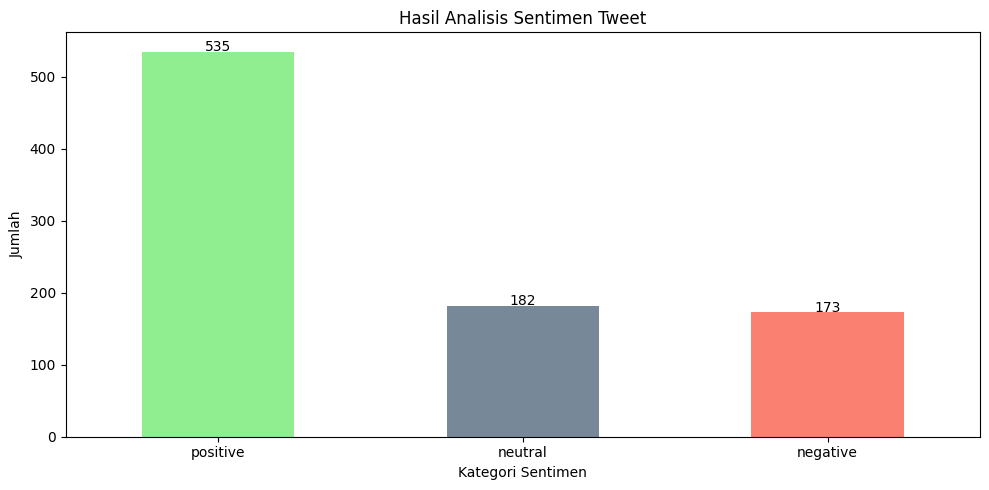

In [18]:
# Visualisasi hasil pelabelan
df = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = df['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(10, 5))
hitung_sentimen.plot(kind='bar', color=['lightgreen', 'lightslategray', 'salmon'])

# Memberikan judul bar
plt.title('Hasil Analisis Sentimen Tweet')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for i, v in enumerate(hitung_sentimen):
    plt.text(i, v + 0.5, str(v), ha='center')

# Tampilkan grafik
plt.tight_layout()
plt.show()

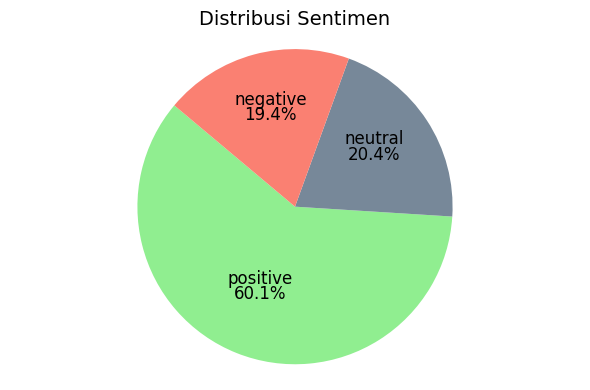

In [19]:
# Visualisasi distribusi hasil pelabelan
df = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = df['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(6, 4))
colors = ['lightgreen', 'lightslategray', 'salmon']
wedges, texts, autotexts = plt.pie(
    hitung_sentimen,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Tambahkan label kategori di atas angka persentase
for i, (wedge, label) in enumerate(zip(wedges, hitung_sentimen.index)):
    theta = (wedge.theta2 + wedge.theta1) / 2.0  # sudut tengah irisan
    x = 0.6 * np.cos(np.deg2rad(theta))
    y = 0.6 * np.sin(np.deg2rad(theta))
    
    # Geser label ke atas sedikit dari persentase
    plt.text(x, y + 0.1, label, ha='center', va='center', fontsize=12)

# Tampilkan grafik
plt.title('Distribusi Sentimen', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Feature Extraction (Count Vectorizer dan TF-IDF)

In [2]:
df = pd.read_csv("labeled_tweet.csv")
x = df['clean_tweet']
y = df['sentimen']

In [3]:
vectorizer = CountVectorizer(min_df = 5)
X_count = vectorizer.fit_transform(x)


In [22]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
tfidf_vectorizer.fit_transform(x)
words = tfidf_vectorizer.get_feature_names_out()
pickle.dump(tfidf_vectorizer.vocabulary_,open("feature_tfidf.sav", "wb"))
x1 = tfidf_vectorizer.fit_transform(x).toarray()
data_tfidf = pd.DataFrame(x1,columns=words)
data_tfidf

abang  abdel  absurd  acak  acetaldehyde  ada  adaktif  adaptasi  \
0      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
1      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
2      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
3      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
4      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
..     ...    ...     ...   ...           ...  ...      ...       ...   
885    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
886    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
887    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
888    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
889    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   

     additive  aditif  ...  yth  yudhoyono  yus  yuswidjajanto  zaman  zat  \
0         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
1         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
2         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
3         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
4         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
..        ...     ...  ...  ...        ...  ...            ...    ...  ...   
885       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
886       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
887       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
888       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
889       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   

     zuairina  zulhas  zulkifli   zx  
0         0.0     0.0       0.0  0.0  
1         0.0     0.0       0.0  0.0  
2         0.0     0.0       0.0  0.0  
3         0.0     0.0       0.0  0.0  
4         0.0     0.0       0.0  0.0  
..        ...     ...       ...  ...  
885       0.0     0.0       0.0  0.0  
886       0.0     0.0       0.0  0.0  
887       0.0     0.0       0.0  0.0  
888       0.0     0.0       0.0  0.0  
889       0.0     0.0       0.0  0.0  

[890 rows x 2131 columns]

## Feature Selection Chi Square

In [23]:
x_train = np.array(data_tfidf)
y_train = np.array(y)

chi2_features = SelectKBest(chi2, k=2100)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)
print('Jumlah fitur asli: ', x_train.shape[1])
print('Jumlah fitur setelah reduced : ', x_kbest_features.shape[1])

Jumlah fitur asli:  2131
Jumlah fitur setelah reduced :  2100


In [24]:
Data = pd.DataFrame({
    "nilai": chi2_features.scores_,
    "fitur": words
})
Data

nilai         fitur
0     1.111855         abang
1     0.176230         abdel
2     0.164666        absurd
3     2.548798          acak
4     0.205663  acetaldehyde
...        ...           ...
2126  0.346903           zat
2127  0.471741      zuairina
2128  2.391930        zulhas
2129  0.405501      zulkifli
2130  0.249700            zx

[2131 rows x 2 columns]

In [25]:
mask = chi2_features.get_support() # mask adalah nilai tertinggi dari hasil chi square

# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi dari hasil chi square
new_feature = []
for bool, f in zip(mask, words):
    if bool:
        new_feature.append(f)
    selected_feature = new_feature

new_selected_feature = {}
for (k,v) in tfidf_vectorizer.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
pickle.dump(new_selected_feature, open("new_selected_feature_tfidf.sav", "wb"))
data_selected_feature = pd.DataFrame(x_kbest_features, columns = selected_feature)
data_selected_feature

abang  abdel  absurd  acak  acetaldehyde  ada  adaktif  adaptasi  \
0      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
1      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
2      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
3      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
4      0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
..     ...    ...     ...   ...           ...  ...      ...       ...   
885    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
886    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
887    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
888    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   
889    0.0    0.0     0.0   0.0           0.0  0.0      0.0       0.0   

     additive  aditif  ...  yth  yudhoyono  yus  yuswidjajanto  zaman  zat  \
0         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
1         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
2         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
3         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
4         0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
..        ...     ...  ...  ...        ...  ...            ...    ...  ...   
885       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
886       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
887       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
888       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   
889       0.0     0.0  ...  0.0        0.0  0.0            0.0    0.0  0.0   

     zuairina  zulhas  zulkifli   zx  
0         0.0     0.0       0.0  0.0  
1         0.0     0.0       0.0  0.0  
2         0.0     0.0       0.0  0.0  
3         0.0     0.0       0.0  0.0  
4         0.0     0.0       0.0  0.0  
..        ...     ...       ...  ...  
885       0.0     0.0       0.0  0.0  
886       0.0     0.0       0.0  0.0  
887       0.0     0.0       0.0  0.0  
888       0.0     0.0       0.0  0.0  
889       0.0     0.0       0.0  0.0  

[890 rows x 2100 columns]

# Algoritma LDA (LinearDiscriminantAnalysis) dan (LatentDirichletAllocation)

In [26]:
# Pembagian data 80% data latih, 20% data uji
selected_x = x_kbest_features
x = selected_x
y = df['sentimen']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Menampilkan jumlah data latih dan data uji
print('Jumlah kata training: ', len(X_train))
print('Jumlah kata testing: ', len(X_test))
print('Jumlah sentimen training: ', len(y_train))
print('Jumlah sentimen testing: ', len(y_test))

Jumlah kata training:  712
Jumlah kata testing:  178
Jumlah sentimen training:  712
Jumlah sentimen testing:  178


In [27]:
# Proses pelatihan model LDA untuk klasifikasi
model = LinearDiscriminantAnalysis() 
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
# Membuat model prediksi berdasarkan data baru
data_input = ("Ketidak jujuran seorang Bahlil Lahadalia tentang campuran etanol pada BBM. Seharusnya saat memutuskan memaknai etanol sebagai campuran BBM harusnya SEBUTKAN juga efeknya. Bahwa tidak semua mesin jenis kendaraan dapat menerima BBM oplosan.")
data_input= text_preprocessing(data_input)

# load TfIdfVectorizer
tfidf_vector = TfidfVectorizer()
load_vectorizer = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tfidf.sav", "rb"))))
hasil = model.predict(load_vectorizer.fit_transform([data_input]))

if(hasil=='positive'):
    sentiment = "Sentimen Positif"
elif(hasil=='neutral'):
    sentiment = "Sentimen Netral"
else:
    sentiment = "Sentimen Negatif"

print("Hasil prediksi: \n", sentiment)

Hasil prediksi: 
 Sentimen Negatif


In [29]:
# Menyimpan model klasifikasi
pickle.dump(model, open("lda_klasifikasi.sav", "wb"))

In [4]:
# Proses pelatihan model LDA untuk modeling topik topik utama
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(X_count)

LatentDirichletAllocation(n_components=20, random_state=0)

# Evaluasi Confusion Matrix

In [31]:
# --- Evaluasi Model LDA klasifikasi ---
y_pred = model.predict(X_test)
print("\n=== LDA Classification Report ===")
print(classification_report(y_test, y_pred))


=== LDA Classification Report ===
              precision    recall  f1-score   support

    negative       0.21      0.44      0.29        32
     neutral       0.26      0.25      0.25        36
    positive       0.77      0.54      0.63       110

    accuracy                           0.46       178
   macro avg       0.41      0.41      0.39       178
weighted avg       0.56      0.46      0.49       178



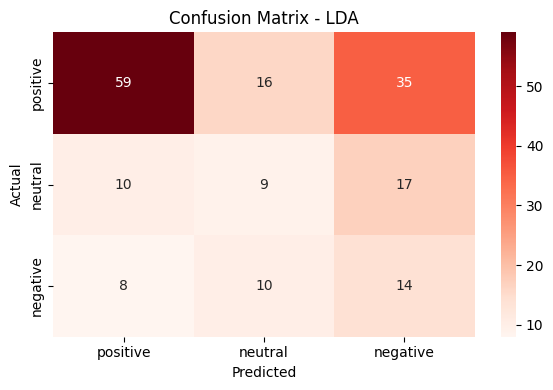

In [32]:
# label pada confusion matrix
label = ['positive', 'neutral', 'negative']
y_pred = model.predict(X_test)
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=label)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)

# Label dan judul
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LDA')
plt.tight_layout()
plt.show()


# Visualisasi

## Wordcloud Positive

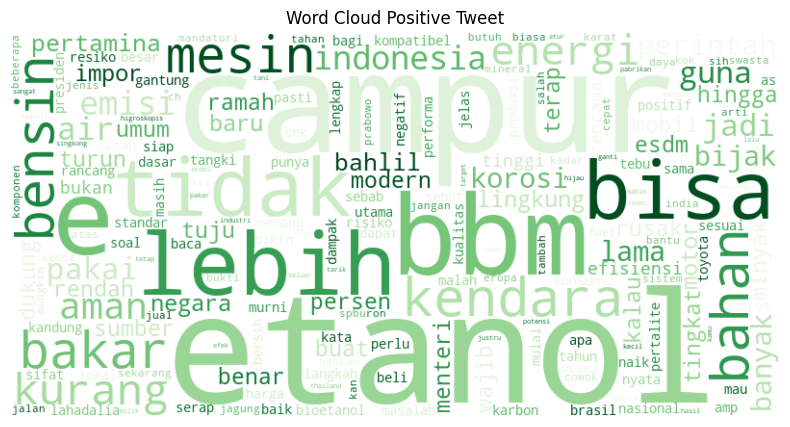

In [33]:
data = pd.read_csv('labeled_tweet.csv')
positif = data[data['sentimen'] == 'positive']  
text = ' '.join(positif['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Greens"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Positive Tweet")
plt.show()

## Wordcloud Neutral

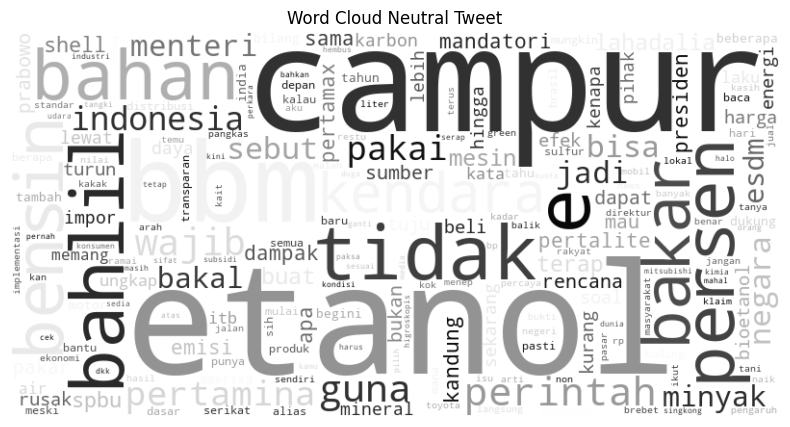

In [34]:
data = pd.read_csv('labeled_tweet.csv')
neutral = data[data['sentimen'] == 'neutral']  
text = ' '.join(neutral['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="gist_yerg"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Neutral Tweet")
plt.show()

## Wordcloud Negative

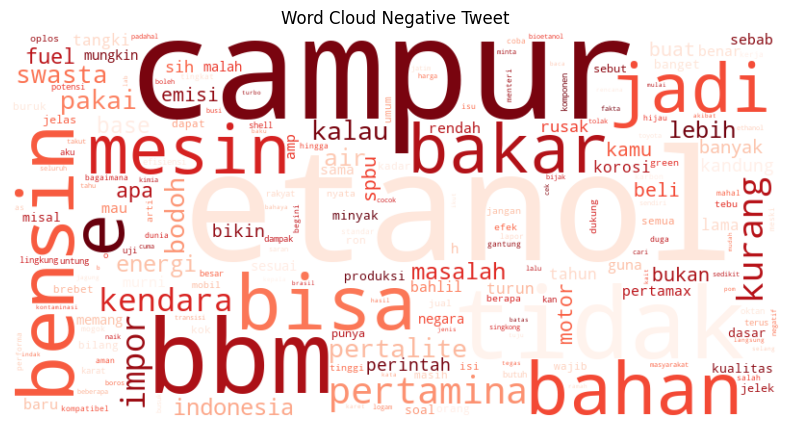

In [35]:
data = pd.read_csv('labeled_tweet.csv')
negative = data[data['sentimen'] == 'negative']  
text = ' '.join(negative['clean_tweet'].astype(str))
word_freq = Counter(text.split())

wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Negative Tweet")
plt.show()

## Visualisasi Topik

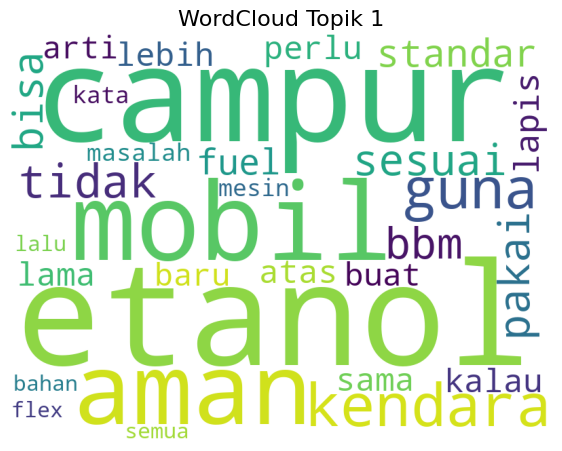

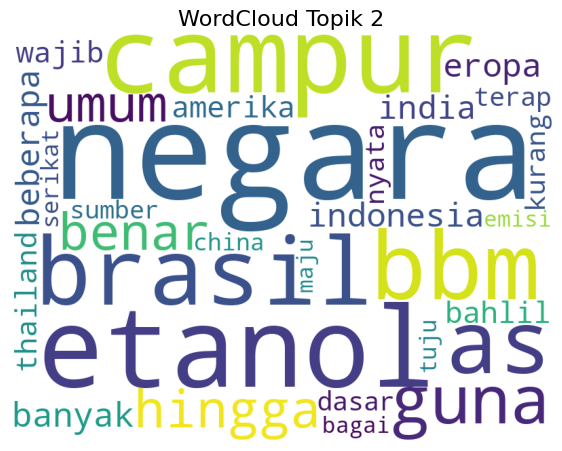

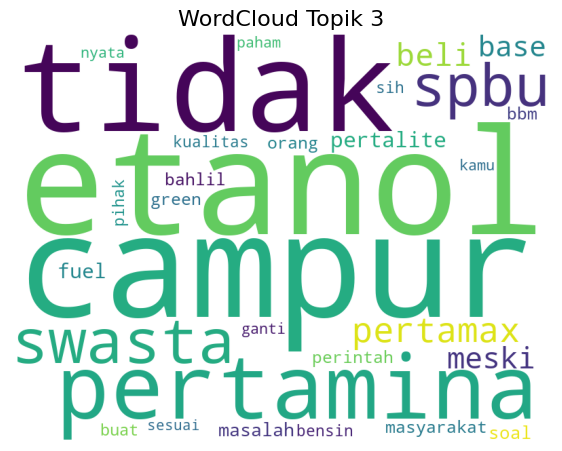

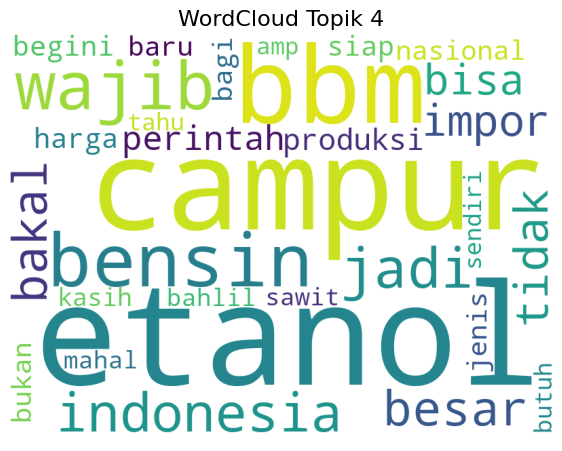

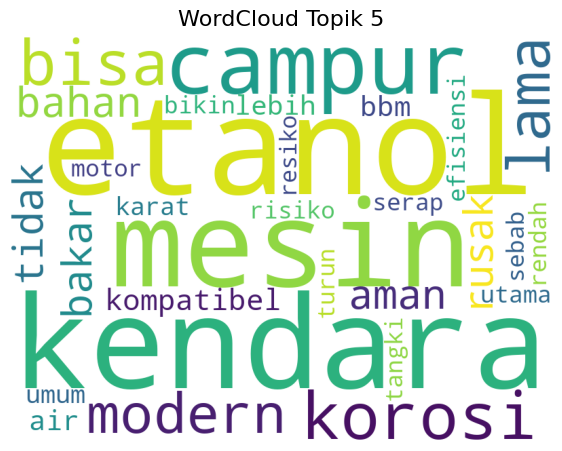

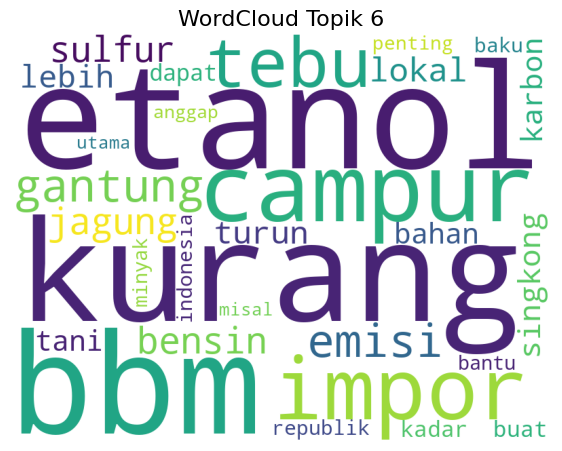

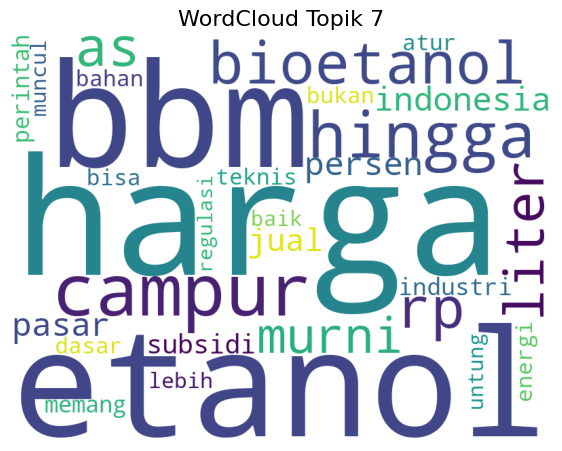

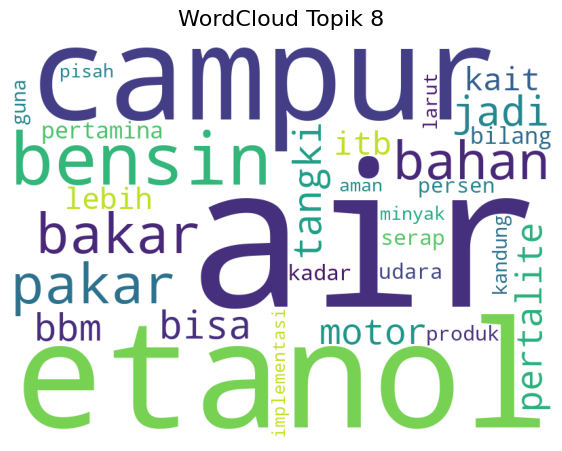

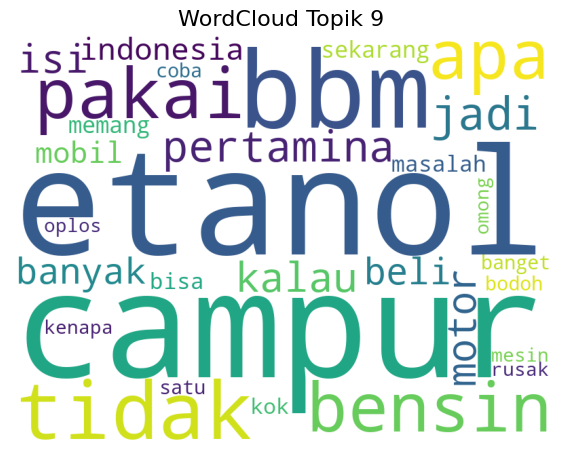

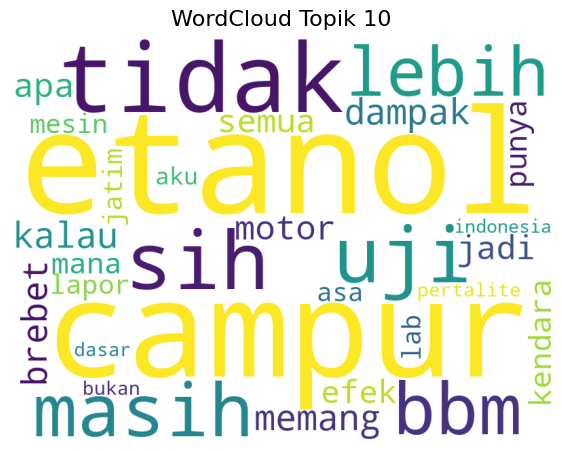

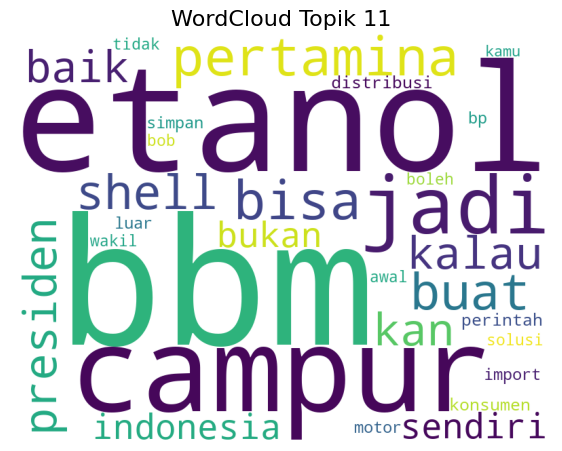

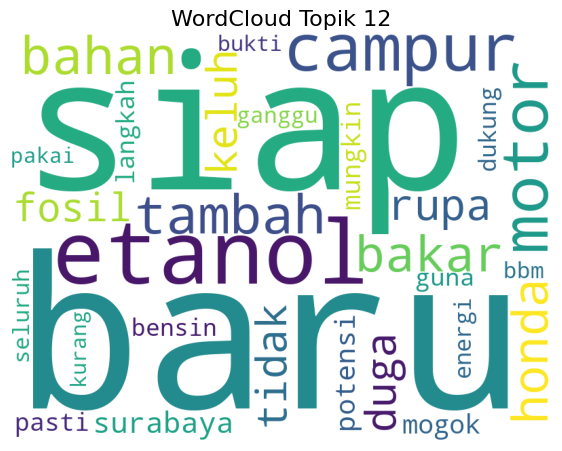

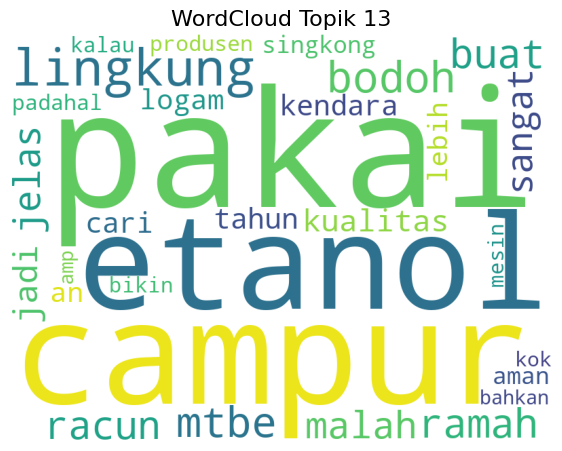

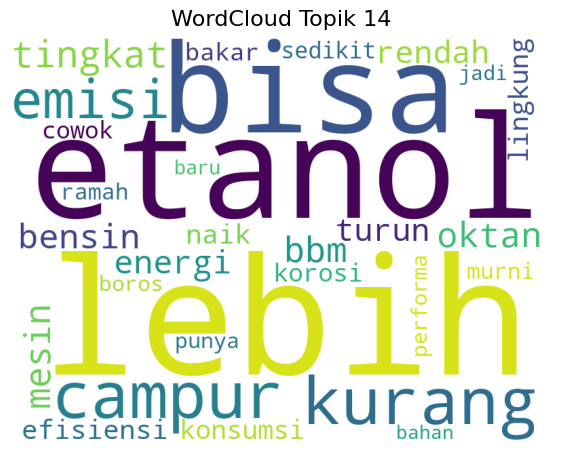

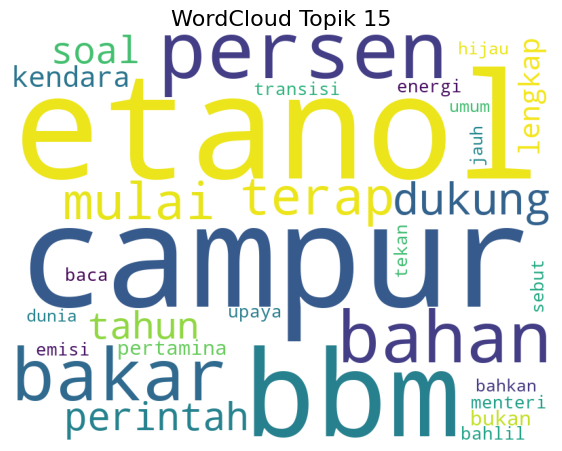

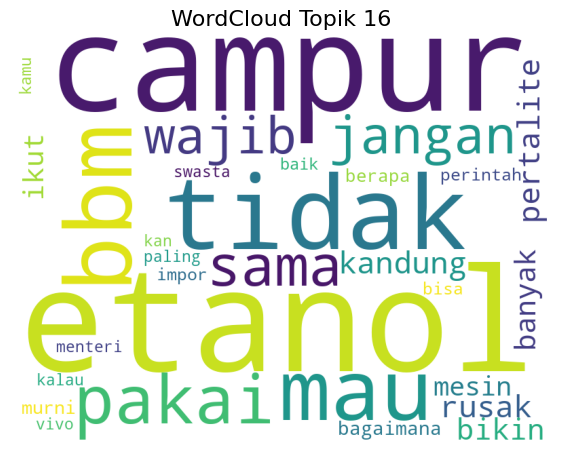

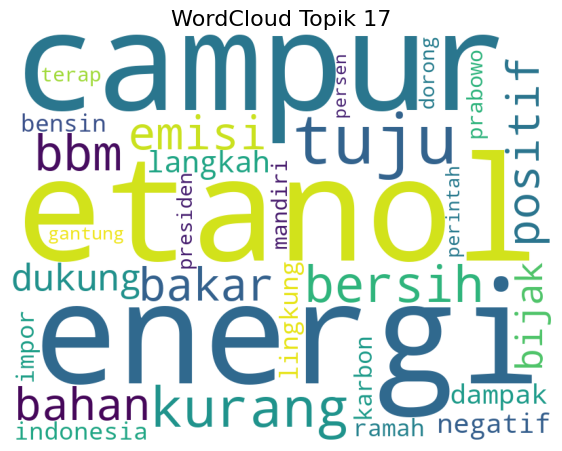

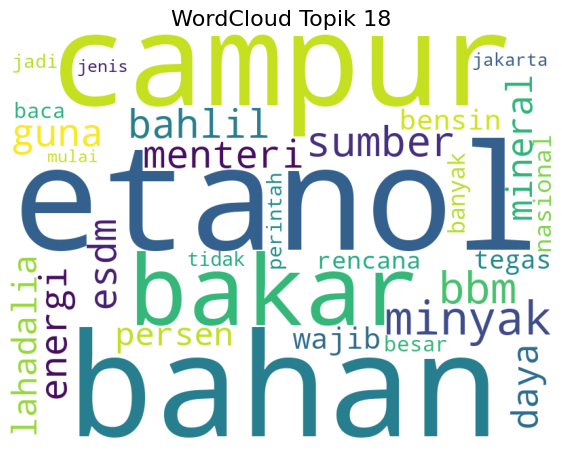

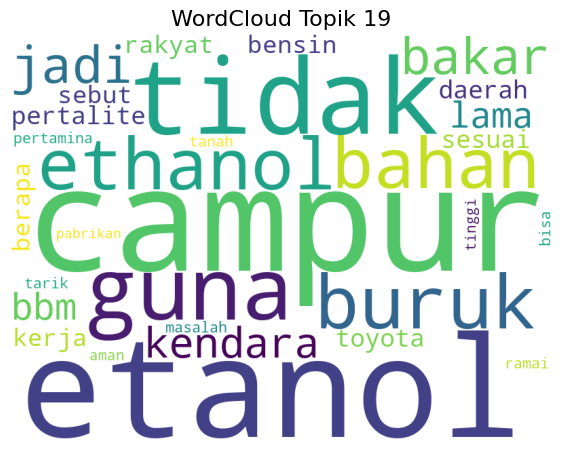

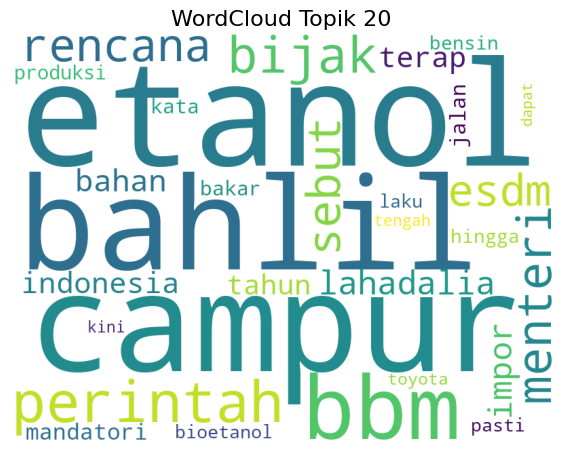

In [5]:
import warnings
words = vectorizer.get_feature_names_out()
warnings.filterwarnings("ignore", category=DeprecationWarning)

for idx, topic in enumerate(lda_tf.components_):
    plt.figure(figsize=(7, 7))

    # Ambil 50 kata dengan bobot tertinggi
    top_indices = topic.argsort()[-30:]
    top_words = {words[i]: topic[i] for i in top_indices}

    # Plot WordCloud
    wordcloud = WordCloud(width=800, height=600, background_color='white')
    plt.imshow(wordcloud.fit_words(top_words))
    plt.title(f"WordCloud Topik {idx+1}", fontsize=16)
    plt.axis("off")
    plt.show()

In [6]:
# Visualisasi modeling topik berdasarkan hasil CountVectorizer
import pyLDAvis
from pyLDAvis import prepare
pyLDAvis.enable_notebook()

# Patch untuk sklearn (karena modul sudah dihapus)
def sklearn_lda_to_pyldavis(lda_model, X, vectorizer):
    vocab = vectorizer.get_feature_names_out()

    # topic-term distributions (phi)
    topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, None]

    # doc-topic distributions (theta)
    doc_topic_dists = lda_model.transform(X)

    # document lengths
    doc_lengths = X.sum(axis=1).A1

    # term frequencies
    term_frequency = np.asarray(X.sum(axis=0)).ravel()

    return prepare(
        topic_term_dists=topic_term_dists,
        doc_topic_dists=doc_topic_dists,
        doc_lengths=doc_lengths,
        vocab=vocab,
        term_frequency=term_frequency
    )

# fungsi visualisasi
panel = sklearn_lda_to_pyldavis(lda_tf, X_count, vectorizer)
pyLDAvis.display(panel)